# PERLER
# Probabilistic Embyo Reconstruction by Linear Evaluation of scRNAseq

This tutorial is application of perler to D. melanogaster (Dmel) dataset (Karaiskos et al., 2017).

### environment

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.15.7
BuildVersion:	19H2


In [2]:
import sys
sys.version

'3.8.3 (default, Jul 14 2020, 15:24:14) \n[Clang 11.0.3 (clang-1103.0.32.62)]'

### import perler

In [3]:
import perler
#for loading data
import pandas as pd
%matplotlib inline

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
perler.__version__

'0.1.0'

### Loading dataset

##### As inputs, perler need...

##### ・scRNAseq data with gene columns and sample rows

##### ・in situ data (ISH) with gene columns and sample rows

##### ・location data for the cells in ISH data (optional)


The dataset below is aquired from Drosophila Virtual Expression eXplorer (DVEX, URL: https://shiny.mdc-berlin.de/DVEX/)


・dge_normalized.txt: scRNAseq data

・bdtnp.txt: in situ data

・geometry_dvex.txt: cell location data


ref: Karaiskos et al, 2017 (doi: 10.1126/science.aan3235)

In [5]:
RNAseq = pd.read_csv('data/dge_normalized.txt',sep='\t').T
BDTNP = pd.read_csv('data/bdtnp.txt', sep='\t')
location=pd.read_csv("data/geometry_dvex.txt", delimiter=" ") #optional

### PERLER procedures

In [6]:
%%time
#Making PERLER object
plr = perler.PERLER(data = RNAseq, reference=BDTNP, print_iter=True)
#Generative linear mapping (the first step of perler)
##The parameter fitting by EM algorithm
plr.em_algorithm(optimize_pi = False)
##Calculate the pair-wise distance between scRNAseq data and reference data
plr.calc_dist()
#Hyperparameter estimation
##conducting LOOCV experiment
plr.loocv()
##fitting the hyperparameters by grid search
plr.grid_search()
#spatial reconstruction (the second step of perler)
plr.spatial_reconstruction(location = location, mirror = True, _3d = True)

0 -inf
5 -299624.18626059196
10 -299590.62390697666
15 -299589.8590121893


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  62 out of  84 | elapsed: 14.8min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  71 out of  84 | elapsed: 18.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  80 out of  84 | elapsed: 18.4min remaining:   55.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 19.0min finished
/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.v

CPU times: user 1h 13min 47s, sys: 21min 52s, total: 1h 35min 40s
Wall time: 57min 17s


##### result

In [7]:
plr.result_with_location.head()

,X,Y,Z,128up,140up,14-3-3epsilon,14-3-3zeta,18w,26-29-p,2mit,...,ZnT77C,ZnT86D,zpg,Zpr1,zuc,Zw10,Zwilch,zyd,zye,Zyx
0,-194.04,0.22,30.20,-0.739069,-1.393472,-0.260589,1.872177,0.630912,-0.101289,-1.049733,...,-1.951010,-0.301837,-1.501124,-1.210678,0.308605,0.846586,-1.923636,-0.195292,0.440880,0.131902
1,-203.32,1.93,20.08,0.473367,0.134813,-0.547033,3.166362,-1.113052,-1.581986,-0.233430,...,-1.485814,-1.433723,-1.963887,-1.130922,0.691803,0.084599,-0.837563,-0.967996,-0.023366,-0.054861
2,-200.25,3.59,23.93,-0.091385,-0.868999,-1.097820,2.800128,-0.314447,-1.204530,-0.874382,...,-0.926128,-0.953141,-2.029136,-1.126496,0.564448,-0.002860,-1.476474,-0.560861,0.181601,-0.622756
3,-205.88,3.58,14.82,2.039144,0.249724,-1.268568,1.440638,-1.474992,-1.293342,-1.220573,...,-0.203949,-1.296218,-2.165345,-1.639595,-0.903268,-0.616723,-1.471205,-0.881958,-0.644366,-0.508275
4,-193.17,9.53,29.67,-1.040152,-0.374649,0.051052,2.688287,0.470806,-0.408677,-0.195628,...,-1.361757,-1.216846,-1.294949,-1.122171,0.265767,0.332753,-1.315198,-0.546326,2.074378,-0.925120


##### Visualization (for the Dmel dataset (Karaiskos., et al, 2017 ))

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/perler/perler_class.py:698: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


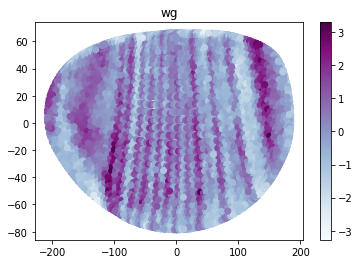

In [8]:
plr.Dmel_visualization(gene = 'wg')